In [58]:
import pandas as pd
import numpy as np
from pprint import pprint
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.utils import to_categorical
from keras.regularizers import l1,l2
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation
from sklearn.ensemble import RandomForestClassifier

In [59]:
data=pd.read_csv('train.csv',parse_dates=['issue_date','listing_date'])
print(len(data))

18834


<BarContainer object of 4 artists>

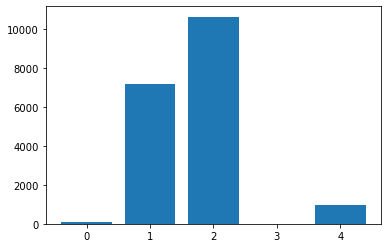

In [60]:
counter=Counter(data['pet_category'])
pyplot.bar(counter.keys(),counter.values())

<BarContainer object of 3 artists>

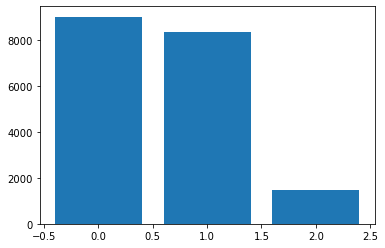

In [61]:
counter=Counter(data['breed_category'])
pyplot.bar(counter.keys(),counter.values())

In [62]:
lt=data['color_type'].value_counts()
print(lt)
uct=data['color_type'].unique()
print(uct)

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Brown Merle            39
Orange                 39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [63]:

sum=0
rem=list()
for st in uct:
    if(lt[st]<100):
        sum+=lt[st]    
        rem.append(st)

print(rem)
print(len(rem))
print(sum)



['Blue Tick', 'Orange', 'Black Tabby', 'Black Brindle', 'Gold', 'Calico Point', 'Red Merle', 'Blue Cream', 'Flame Point', 'Yellow Brindle', 'Blue Tiger', 'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke', 'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot', 'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver', 'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick', 'Pink', 'Black Tiger', 'Silver Lynx Point']
32
729


In [64]:

rem_id=data[data['color_type'].isin(rem)].index
#data=data[~data['color_type'].isin(rem)]
print(len(rem_id))
data.drop(rem_id,inplace=True)
data.to_csv('ntrain.csv')
#data=pd.DataFrame(data)
data=pd.read_csv('ntrain.csv',parse_dates=['issue_date','listing_date'])
print(len(data))



729
18105


In [65]:
#data['color_type'].value_counts()

In [66]:
data.shape

(18105, 12)

In [67]:
data

,Unnamed: 0,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18100,18828,ANSL_74245,2017-01-11,2018-08-06 13:18:00,1.0,Cream Tabby,0.98,33.81,17,9,0.0,1
18101,18829,ANSL_51738,2017-01-26,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18102,18830,ANSL_59900,2016-06-18,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4
18103,18832,ANSL_63468,2017-05-12,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


In [68]:
data['breed_category']=data['breed_category'].astype('int32')
data['condition']=data['condition'].ffill()
data['condition']=data['condition'].astype('int32')
data.dtypes

Unnamed: 0                 int64
pet_id                    object
issue_date        datetime64[ns]
listing_date      datetime64[ns]
condition                  int32
color_type                object
length(m)                float64
height(cm)               float64
X1                         int64
X2                         int64
breed_category             int32
pet_category               int64
dtype: object

In [69]:
data['issue_month']=data['issue_date'].dt.month
data['issue_year']=data['issue_date'].dt.year
data['list_month']=data['listing_date'].dt.month
data['list_year']=data['listing_date'].dt.year
data['issue_day']=data['issue_date'].dt.day
data['list_day']=data['listing_date'].dt.day
data['list_hour']=data['listing_date'].dt.hour

In [70]:
data['length(cm)']=data['length(m)']*100       #use rename instead
data.drop(['length(m)'],inplace=True,axis=1)

In [71]:
enc=OneHotEncoder(handle_unknown='ignore')
enc_feat=enc.fit_transform(data[['condition','color_type']]).toarray()

In [72]:
df=pd.DataFrame(enc_feat)

In [73]:
type(df)

pandas.core.frame.DataFrame

In [74]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
data.shape

(18105, 19)

In [76]:
len(data['X1'])

18105

In [77]:
trainX1=pd.concat([data[['height(cm)','length(cm)','X1','X2','issue_month','issue_year','list_day','list_hour','issue_day','list_month','list_year']],df],axis=1)
trainX2=pd.concat([data[['height(cm)','length(cm)','X1','X2','issue_month','issue_year','list_day','list_hour','issue_day','list_month','list_year']],df],axis=1)
print(trainX1.shape)
#trainX=data[['height(cm)','length(cm)','X1','X2','issue_month','issue_year','list_month','list_year']]
trainY1,trainY2=data[['pet_category']],data[['breed_category']]
print(trainY1.shape)

(18105, 38)
(18105, 1)


<BarContainer object of 4 artists>

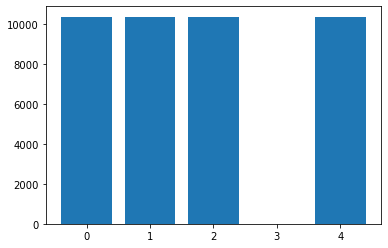

In [78]:
oversample=SMOTE()
trainX1,trainY1=oversample.fit_resample(trainX1,data['pet_category'])
counter=Counter(trainY1)
pyplot.bar(counter.keys(),counter.values())

<BarContainer object of 3 artists>

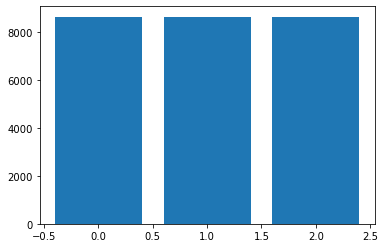

In [79]:
oversample=SMOTE()
trainX2,trainY2=oversample.fit_resample(trainX2,data['breed_category'])
counter=Counter(trainY2)
pyplot.bar(counter.keys(),counter.values())

In [80]:
print(trainX1.shape,trainY1.shape)
print(trainX2.shape,trainY2.shape)

(41416, 38) (41416,)
(25926, 38) (25926,)


In [81]:
scaler=StandardScaler()
trainX1[trainX1.columns[0:11]]=scaler.fit_transform(trainX1[trainX1.columns[0:11]])

In [82]:
trainX2[trainX2.columns[0:11]]=scaler.fit_transform(trainX2[trainX2.columns[0:11]])

In [83]:
trainY1,trainY2=to_categorical(trainY1),to_categorical(trainY2)
print(trainY1.shape,trainY2.shape)

(41416, 5) (25926, 3)


In [84]:
trainX1

,height(cm),length(cm),X1,X2,issue_month,issue_year,list_day,list_hour,issue_day,list_month,...,17,18,19,20,21,22,23,24,25,26
0,-1.501572,0.984674,0.843942,1.642107,0.221941,0.211863,0.669001,0.714369,-0.487648,0.761817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.994962,0.702179,0.843942,1.642107,1.555552,-1.069088,1.393906,0.967743,0.786326,1.698524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
2,1.116045,-1.310596,1.133691,-0.032996,0.888746,-0.642104,0.427366,-1.312628,1.597037,1.074053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,-0.708067,0.349061,-1.039426,-1.038057,1.888954,0.211863,1.152271,1.221118,1.944485,-1.736068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
4,-1.242339,-0.074682,1.568314,-0.032996,0.888746,0.638846,0.427366,-1.059253,1.597037,1.386288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41411,-0.586493,0.292839,1.278565,-0.032996,-1.111669,0.638846,1.393906,-0.299130,-0.603464,-1.111597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41412,0.490825,-0.800883,1.133691,-0.032996,-0.111462,0.211863,-1.022445,-1.312628,0.091431,0.137346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41413,-0.335353,-1.068573,1.423440,-0.032996,-1.445072,0.638846,1.152271,0.714369,-1.182543,-1.423832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
41414,0.310762,1.571194,-1.039426,-1.038057,-0.444864,0.211863,0.910636,0.460994,-1.066727,-0.487126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.760972,0.0


In [85]:
def testit(model,testX,testY,histories,target_names):
    print('Testing Accuracy: ')
    _,acc=model.evaluate(testX,testY)
    print('%.3f'%(acc*100.0))
    pred=model.predict(testX)
    pred=np.argmax(pred,axis=1)
    testY=np.argmax(testY,axis=1)
    print('Confusion Matrix:')
    print(confusion_matrix(testY,pred))
    
    print('Classification Report')
    print(classification_report(testY,pred,target_names=target_names))
    
    for i in range(len(histories)):
        pyplot.subplot(211)
        pyplot.title('Crossentropy Loss')
        pyplot.plot(histories[i].history['loss'],color='orange',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='blue',label='dev')
        pyplot.subplot(212)
        pyplot.title('classification_accuracy')
        pyplot.plot(histories[i].history['accuracy'],color='orange',label='train')
        pyplot.plot(histories[i].history['val_accuracy'],color='blue',label='dev')
    
    pyplot.tight_layout(pad=3.0)
    pyplot.show()
    

In [105]:
x_train,x_test,y_train,y_test=train_test_split(trainX1,trainY1,test_size=0.2)

In [106]:
model1=Sequential()
model1.add(Dense(100,activation='relu',input_shape=(trainX1.shape[1],)))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(5,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               3900      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 505       
Total params: 24,605
Trainable params: 24,605
Non-trainable params: 0
_________________________________________________________________


In [107]:
histories=list()
history=model1.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=0.06)
histories.append(history)

Train on 31144 samples, validate on 1988 samples
Epoch 1/8
31144/31144 [==============================] - 15s 480us/step - loss: 0.4418 - accuracy: 0.8301 - val_loss: 0.2627 - val_accuracy: 0.9014-
Epoch 2/8
31144/31144 [==============================] - 14s 452us/step - loss: 0.2366 - accuracy: 0.9098 - val_loss: 0.2185 - val_accuracy: 0.9135
Epoch 3/8
31144/31144 [==============================] - 14s 455us/step - loss: 0.1944 - accuracy: 0.9211 - val_loss: 0.1761 - val_accuracy: 0.9311
Epoch 4/8
31144/31144 [==============================] - 14s 442us/step - loss: 0.1719 - accuracy: 0.9293 - val_loss: 0.1782 - val_accuracy: 0.9245
Epoch 5/8
31144/31144 [==============================] - 15s 469us/step - loss: 0.1587 - accuracy: 0.9350 - val_loss: 0.1657 - val_accuracy: 0.9346
Epoch 6/8
31144/31144 [==============================] - 15s 466us/step - loss: 0.1480 - accuracy: 0.9394 - val_loss: 0.1482 - val_accuracy: 0.9396
Epoch 7/8
31144/31144 [==============================] - 14s 4

train_accuracy for model1:
41416/41416 [==============================] - ETA:  - 9s 207us/step
94.41037178039551
Testing Accuracy: 
8284/8284 [==============================] - 2s 206us/step
93.385
Confusion Matrix:
[[2021   12    1    1]
 [   2 1825  218   17]
 [   6  159 1876   45]
 [  16   26   45 2014]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2035
           1       0.90      0.89      0.89      2062
           2       0.88      0.90      0.89      2086
           4       0.97      0.96      0.96      2101

    accuracy                           0.93      8284
   macro avg       0.93      0.93      0.93      8284
weighted avg       0.93      0.93      0.93      8284



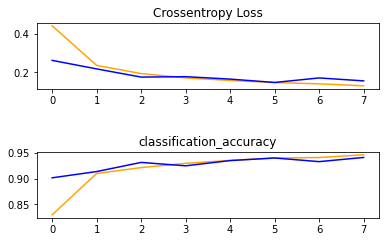

In [108]:
print('train_accuracy for model1:')
_,acc=model1.evaluate(trainX1,trainY1)
print(acc*100.0)

testit(model1,x_test,y_test,histories,['0','1','2','4'])

In [109]:
x_train,x_test,y_train,y_test=train_test_split(trainX2,trainY2,test_size=0.2)

In [110]:
model2=Sequential()
model2.add(Dense(100,activation='relu',input_shape=(trainX2.shape[1],)))
model2.add(Dense(100,activation='relu'))
model2.add(Dense(100,activation='relu'))
model2.add(Dense(3,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               3900      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 303       
Total params: 24,403
Trainable params: 24,403
Non-trainable params: 0
_________________________________________________________________


In [111]:
histories=list()
history=model2.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=0.06)
histories.append(history)

Train on 19495 samples, validate on 1245 samples
Epoch 1/8
19495/19495 [==============================] - 9s 485us/step - loss: 0.3896 - accuracy: 0.8262 - val_loss: 0.3228 - val_accuracy: 0.8474
Epoch 2/8
19495/19495 [==============================] - 9s 458us/step - loss: 0.2630 - accuracy: 0.8782 - val_loss: 0.2641 - val_accuracy: 0.8747
Epoch 3/8
19495/19495 [==============================] - 9s 471us/step - loss: 0.2255 - accuracy: 0.8939 - val_loss: 0.2530 - val_accuracy: 0.8707
Epoch 4/8
19495/19495 [==============================] - 8s 431us/step - loss: 0.2065 - accuracy: 0.9014 - val_loss: 0.2295 - val_accuracy: 0.8843
Epoch 5/8
19495/19495 [==============================] - 9s 458us/step - loss: 0.1899 - accuracy: 0.9098 - val_loss: 0.2262 - val_accuracy: 0.8795
Epoch 6/8
19495/19495 [==============================] - 9s 482us/step - loss: 0.1790 - accuracy: 0.9140 - val_loss: 0.2309 - val_accuracy: 0.8827
Epoch 7/8
19495/19495 [==============================] - 9s 483us/ste

train_accuracy for model2:
25926/25926 [==============================] - 5s 207us/step
92.67916083335876
Testing Accuracy: 
5186/5186 [==============================] - 1s 209us/step
89.626
Confusion Matrix:
[[1550  101   36]
 [ 257 1463   28]
 [  65   51 1635]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1687
           1       0.91      0.84      0.87      1748
           2       0.96      0.93      0.95      1751

    accuracy                           0.90      5186
   macro avg       0.90      0.90      0.90      5186
weighted avg       0.90      0.90      0.90      5186



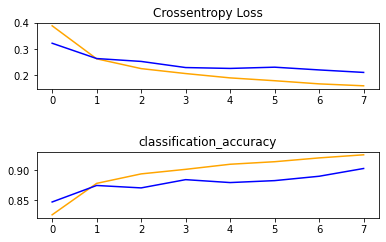

In [112]:
print('train_accuracy for model2:')
_,acc=model2.evaluate(trainX2,trainY2)
print(acc*100.0)

testit(model2,x_test,y_test,histories,['0','1','2'])

In [113]:
ndata=pd.read_csv('test.csv',parse_dates=['issue_date','listing_date'])
ids=ndata['pet_id']

In [114]:
#ndata['color_type']=le.transform(ndata['color_type'])
ndata['issue_month']=ndata['issue_date'].dt.month
ndata['issue_year']=ndata['issue_date'].dt.year
ndata['list_month']=ndata['listing_date'].dt.month
ndata['list_year']=ndata['listing_date'].dt.year
ndata['issue_day']=ndata['issue_date'].dt.day
ndata['list_day']=ndata['listing_date'].dt.day
ndata['list_hour']=ndata['listing_date'].dt.hour
ndata['length(cm)']=ndata['length(m)']*100       #use rename instead
ndata.drop(['length(m)'],inplace=True,axis=1)
ndata['condition']=ndata['condition'].ffill()
ndata['condition']=ndata['condition'].astype('int32')

In [115]:
enc_feat=enc.transform(ndata[['condition','color_type']]).toarray()
df=pd.DataFrame(enc_feat)
testX=pd.concat([ndata[['height(cm)','length(cm)','X1','X2','issue_month','issue_year','list_day','list_hour','issue_day','list_month','list_year']],df],axis=1)
#scaler=StandardScaler()
testX[testX.columns[0:11]]=scaler.transform(testX[testX.columns[0:11]])

In [116]:
testX

,height(cm),length(cm),X1,X2,issue_month,issue_year,list_day,list_hour,issue_day,list_month,...,17,18,19,20,21,22,23,24,25,26
0,1.169057,1.257291,-1.085209,0.666172,0.406480,-3.820069,-0.965746,0.322265,0.163378,0.651664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.611583,-1.541311,-1.085209,-1.178119,1.350557,0.989055,-0.852349,0.827667,-0.066457,-0.516169,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.051718,-0.919399,-1.085209,0.666172,1.035865,-1.230540,-1.532731,0.574966,-0.526125,-0.808128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.476488,-0.746646,-0.074629,-1.178119,-1.481673,-0.120742,-1.079143,-1.699342,-0.296291,-0.808128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.257359,0.704481,-1.085209,0.666172,-1.796365,0.619123,1.188796,-0.183136,0.278295,-0.808128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,0.655697,1.084538,0.791583,1.280936,-1.481673,0.249190,-0.625555,0.069564,-0.641042,-1.100086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8068,-0.003567,-0.055633,0.791583,1.280936,1.665249,-0.120742,-0.398762,-3.468248,-0.985793,-1.392045,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8069,0.741385,1.637349,-1.085209,0.666172,1.665249,-0.120742,-1.305937,0.827667,-0.870876,-1.684003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8070,-0.289968,0.980886,-1.085209,-0.870737,-0.222904,0.249190,0.508414,1.080368,1.427465,0.067748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
pet_category=model1.predict(testX)
pet_category=np.argmax(pet_category,axis=1)
breed_category=model2.predict(testX)
breed_category=np.argmax(breed_category,axis=1)

In [118]:
tuples=list(zip(ids,breed_category,pet_category))
df=pd.DataFrame(tuples,columns=['pet_id','breed_category','pet_category'])

In [119]:
df.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2


In [120]:
df.set_index("pet_id",inplace=True)

In [121]:
df.head()

,breed_category,pet_category
pet_id,,
ANSL_75005,1,2
ANSL_76663,0,1
ANSL_58259,0,2
ANSL_67171,0,2
ANSL_72871,0,2


In [122]:
df.to_csv('res.csv')

In [123]:
len(df)

8072